In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('C:\\Users\\r.hakimov\\Documents\\GitHub\\ReinforcementLearning'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:

from Models.A2C import A2C
import gym

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Utils import encode_actions
NUM_EPOCHS = 5000


Using TensorFlow backend.


In [4]:
def run_training(env,model,action_array):
    actor_losses = []
    critic_losses = []
    total_rewards = []
    for i_episode in range(NUM_EPOCHS):
        if i_episode%100==1:
            print(str(i_episode)+' Total Reward = '+ str(total_rewards[-1]))
        states,actions,rewards,next_states,dones = [],[],[],[],[]       
        observation = env.reset()
        done = False
        k = 0
        total_reward = 0
        while done==False:
    
            k=k+1
            action = model.predict_action(np.array([observation]))
            states.append(observation)
            observation, reward, done, info = env.step(action_array[action])
            if (k>200):
                done = True
           
            next_states.append(observation)
            actions.append(action)
            rewards.append(reward)
            dones.append(done)
            total_reward+=reward        
        actor_loss, critic_loss = model.train(states,actions,rewards,next_states,dones)
        total_rewards.append(total_reward)
        actor_losses.append(actor_loss)
        critic_losses.append(critic_loss)
    return total_rewards

In [20]:
env = gym.make('CartPole-v0')
model = A2C(env.observation_space.shape[0],2,[8,16],lr_actor=0.001,lr_critic=0.001,gamma=0.99)
a2c_total_rewards = run_training(env,model,[0,1])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


1 Total Reward = 30.0


101 Total Reward = 22.0


201 Total Reward = 19.0


301 Total Reward = 33.0


401 Total Reward = 47.0


501 Total Reward = 11.0


KeyboardInterrupt: 

In [4]:
def plot_running_reward(total_rewards,gamma = 0.9):    
    running_rewards = []
    running_reward = 0
    for i in range(len(total_rewards)):
        running_reward = gamma*running_reward+(1-gamma)*total_rewards[i]
        running_rewards.append(running_reward)
    plt.plot(range(0,NUM_EPOCHS),running_rewards)


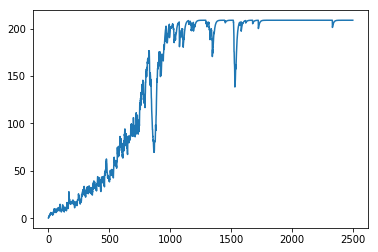

In [10]:
plot_running_reward(a2c_total_rewards,0.9)

In [5]:
env = gym.make('BipedalWalker-v2')
encoded_actions = encode_actions(env.action_space.low,env.action_space.high,[0.5,0.5,0.5,0.5])
model = A2C(env.observation_space.shape[0],len(encoded_actions),[64,128,256,512],lr_actor=0.001,lr_critic=0.001,gamma=0.99)
a2c_total_rewards = run_training(env,model,encoded_actions)

c:\users\r.hakimov\appdata\local\programs\python\python36\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


1 Total Reward = -102.2385963149139


101 Total Reward = -111.73805641359465


201 Total Reward = -111.63000811845811


301 Total Reward = -111.80113599992482


401 Total Reward = -111.56703099421972


501 Total Reward = -111.5642340893373


601 Total Reward = -111.85318979092999


701 Total Reward = -111.82289838208632


801 Total Reward = -111.8328145797501


901 Total Reward = -111.55437770697351


1001 Total Reward = -111.84111893743402


1101 Total Reward = -111.67483328104144


1201 Total Reward = -111.73088484125337


1301 Total Reward = -111.53459116725314


1401 Total Reward = -111.7935334523966


1501 Total Reward = -111.49306477856575


1601 Total Reward = -111.654916747937


1701 Total Reward = -111.6014116952022


1801 Total Reward = -111.75762171841352


1901 Total Reward = -111.81640822789447


2001 Total Reward = -111.6919961746298


2101 Total Reward = -111.90145474509151


2201 Total Reward = -111.84852312520582


2301 Total Reward = -111.87381076866886


2401 Total Reward = -111.77889261751561


2501 Total Reward = -111.59573417203316


2601 Total Reward = -111.72555809297103


2701 Total Reward = -111.60687998503572


2801 Total Reward = -111.6915531206547


2901 Total Reward = -111.58563945892392


3001 Total Reward = -111.63805987623645


3101 Total Reward = -111.42187873803763


3201 Total Reward = -111.8531954477057


3301 Total Reward = -111.6229311007367


3401 Total Reward = -111.7870390171477


3501 Total Reward = -111.6069982189201


3601 Total Reward = -112.01544812855933


3701 Total Reward = -111.91614483583844


3801 Total Reward = -111.77748408665074


3901 Total Reward = -111.90951246620591


4001 Total Reward = -111.70721737706538


4101 Total Reward = -111.67186641654125


4201 Total Reward = -111.96187065494993


4301 Total Reward = -111.71057728817502


4401 Total Reward = -111.7002370275228


4501 Total Reward = -111.5817946135824


4601 Total Reward = -111.88598027569057


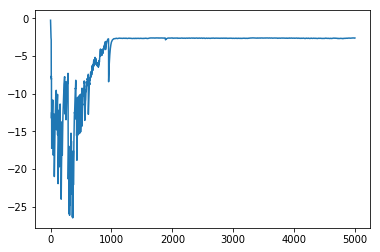

In [40]:
plot_running_reward(a2c_total_rewards,0.95)